# Function
Consists of init, setting a learning rate, fitting, update the step. computing, caculating square loss and RMSE

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

class linear_regression_MultipleD:
    
    def __init__(self):
        # Define the vector w (the slop of the line)
        self.w = np.zeros(7 + 1) # Add one for the intercept term
        # Define the learning rate
        self.alpha = 1

    def set_learning_rate(self, alpha):
        self.alpha = alpha

    def fit(self, x, y, iteration=1500):
        self.loss_values = []
        self.y = y

        self.x = np.c_[x, np.ones(x.shape[0])]

        for i in range(iteration):
            if not self.make_one_update():
                self.set_learning_rate(self.alpha * 0.1)
            self.loss_values.append(self.sq_loss(self.w))

    def make_one_update(self):
        w_current = self.w
        step = (-1)*self.alpha*self.compute_gradient(w_current)
        w_update = w_current + step
        
        current_loss = self.sq_loss(w_current)
        update_loss = self.sq_loss(w_update)
        if current_loss > update_loss:
            print("Loss decreases to ", update_loss,)
            self.w = w_update
            return True
        else:
            print("Loss increases to ", update_loss,)
            return False

    def compute_gradient(self, w_current):
        grad_v = np.zeros(8)
        x = self.x
        y = self.y

        for j in range(8):
            grad_v[j] = 2 / len(y) * np.sum((x.dot(w_current) - y) * x[:, j])

        print("The norm of grad vector is ", math.sqrt(np.inner(grad_v, grad_v)))
        return grad_v
        
    def sq_loss(self, w):
        x = self.x
        y = self.y
        loss = np.sum((x.dot(w) - y) ** 2) / len(y)
        return loss
        pass

    def calculate_rmse(self, y_pred):
        y = self.y
        rmse = np.sqrt(np.mean((y_pred - y) ** 2))
        return rmse

# Dataset

In [2]:
df = pd.read_csv('regular_season_2022-23.csv', encoding='ISO-8859-1', sep=';')
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


Here are all the columns in the dataset

In [3]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

check for a null/missing value

In [4]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

We will exclusively utilize the following features for our linear regression analysis:
1) MP: Minutes played per game.
2) FG: Field goals made per game.
3) FGA: Field goals attempted per game.
4) FG%: Field goal percentage, i.e., the ratio of field goals made to attempted.
5) 3P%: Three-point field goal percentage.
6) 2P%: Two-point field goal percentage.
7) FT%: Free throw percentage.

The goal is to find a model that will estimate/predict each player point per game

In [5]:
x = df[['MP', 'FG', 'FGA', 'FG%', '3P%', '2P%', 'FT%']].values
y = df['PTS'].values

In [6]:

h = linear_regression_MultipleD()

h.set_learning_rate(0.001)

h.fit(x, y, iteration=1000)

The norm of grad vector is  498.63329055297805
Loss decreases to  10.375983542355542
The norm of grad vector is  51.6988126732225
Loss decreases to  9.067157730405956
The norm of grad vector is  14.655516529185167
Loss decreases to  8.867107279862834
The norm of grad vector is  13.630050002448522
Loss decreases to  8.682577869347305
The norm of grad vector is  13.457633753703382
Loss decreases to  8.502557945681286
The norm of grad vector is  13.296056054367941
Loss decreases to  8.326833484453331
The norm of grad vector is  13.136517217537724
Loss decreases to  8.155300655687174
The norm of grad vector is  12.978905211089264
Loss decreases to  7.987859161947693
The norm of grad vector is  12.823196021104911
Loss decreases to  7.824411116200463
The norm of grad vector is  12.669366798388634
Loss decreases to  7.6648609737848785
The norm of grad vector is  12.51739497829254
Loss decreases to  7.509115476261677
The norm of grad vector is  12.367258268554181
Loss decreases to  7.357083596

Let's plot a loss value for each update being made

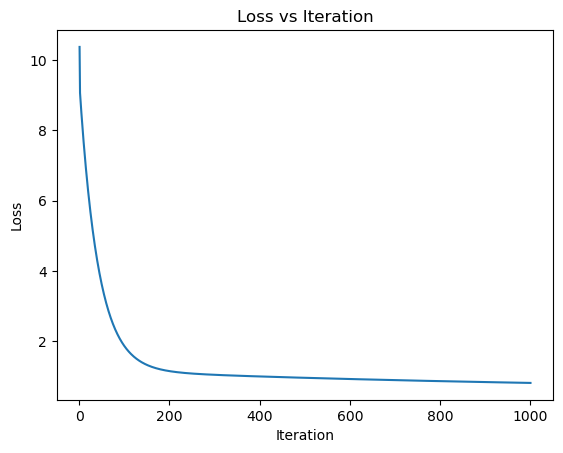

In [7]:
plt.plot(range(1, len(h.loss_values) + 1), h.loss_values)

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')

plt.show()

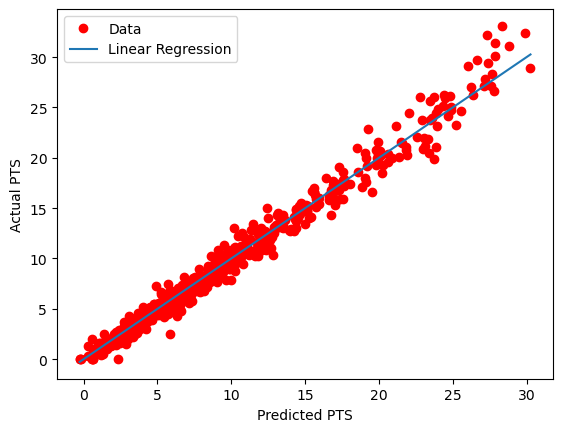

In [8]:

predicted_values = np.dot(x, h.w[:-1]) + h.w[-1]

plt.plot(predicted_values, y, 'ro', label='Data')

plt.plot(np.sort(predicted_values), np.sort(predicted_values), linestyle='solid', label='Linear Regression')

plt.xlabel('Predicted PTS')
plt.ylabel('Actual PTS')
plt.legend()

plt.show()

We used RMSE (Root Mean Square Error) to measure the performance of the model.

In [9]:
rmse = h.calculate_rmse(predicted_values)
print("RMSE:", rmse)

RMSE: 0.8996799165364595
